In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import numpy as np
import pandasgui as pandasgui

ContextualVersionConflict: (pyobjc-framework-Cocoa 10.1 (/Users/edvinrunhellen/Applications/anaconda3/lib/python3.12/site-packages), Requirement.parse('pyobjc-framework-Cocoa>=11.0'), {'pyobjc-framework-ApplicationServices', 'pyobjc-framework-Quartz'})

In [90]:
pip install pandasgui

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.9/983.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.8/739.8 kB 9.1 MB/s eta 0:00:00
  Created wheel for pandasgui: filename=pandasgui-0.2.14-py3-none-any.whl size=235578 sha256=04f6b6de40dd79dd76ff34a679eaf7a5014dbfe347fbc4da735198e5efda7c2a
  Stored in directory: /Users/edvinrunhellen/Library/Caches/pip/wheels/e4/dc/c2/96f9cbfcb7e08e718bd83edc95a9b534304b8053dcd0b74768
  Created wheel for qtstylish: filename=qtstylish-0.1.5-py3-none-any.whl size=1029267 sha256=b7e581d0a5921e81adf2208769d8a218726a5f1a52cfafc9f418b647035f5c8b
  Stored in directory: /Users/edvinrunhellen/Library/Caches/pip/wheels/33/6f/1a/cd829ecf5647f0b31adeeea886b6f12f356156c615702eb1ab
Successfully built pandasgui qtstylish
  Attempting uninstall: pyobjc-core
    Found existing installation: pyobjc-core 10.1
    Uninstalling pyobjc-core-10.1:
      Successfully 

In [6]:
df = pd.read_csv("diamonds.csv")
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07   
3           4   0.29      NaN   NaN     NaN    NaN    NaN    NaN  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

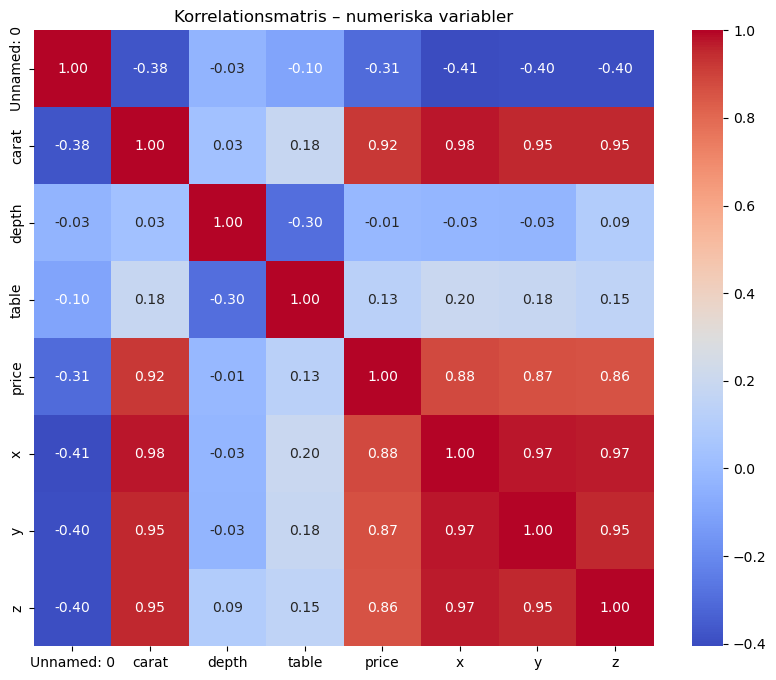

In [10]:
df_clean = df.dropna()

# Skapa korrelationsmatris för numeriska variabler
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatris – numeriska variabler")
plt.show()

### Korrelationsanalys
För att identifiera vilka faktorer som påverkar diamantens pris mest analyserar vi sambandet mellan pris och andra numeriska variabler med en korrelationsmatris. En stark positiv korrelation tyder på att priset ökar med variabeln.


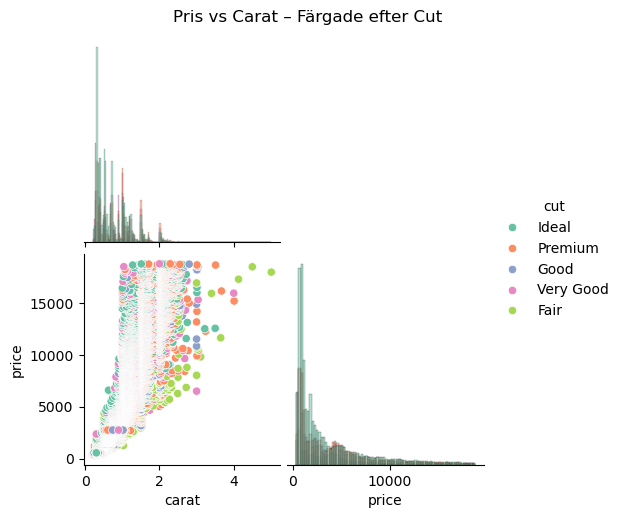

In [13]:
# Parplot med histograms på diagonalen och 'cut' som färg
sns.pairplot(df_clean, vars=["carat", "price"], hue="cut", palette="Set2", corner=True, diag_kind="hist")
plt.suptitle("Pris vs Carat – Färgade efter Cut", y=1.02)
plt.show()

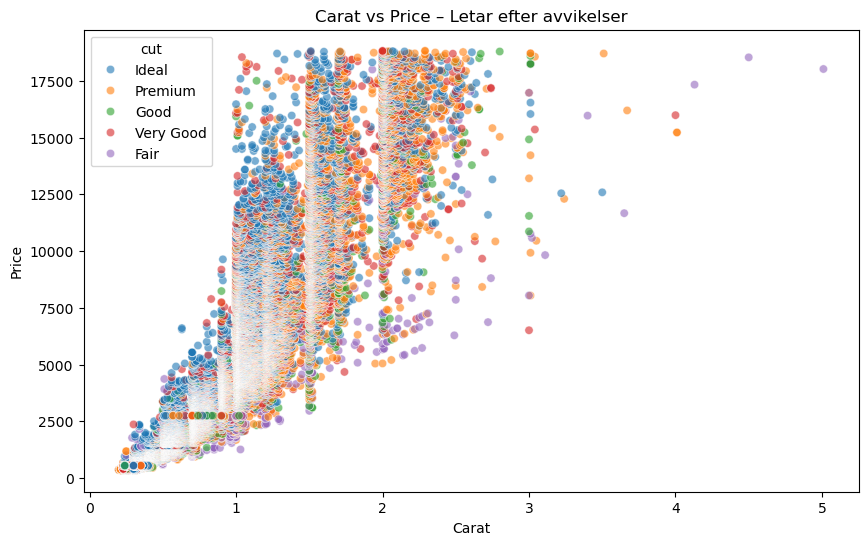

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='carat', y='price', hue='cut', alpha=0.6)
plt.title('Carat vs Price – Letar efter avvikelser')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [19]:
# Vi jobbar bara med de kolumner vi är intresserade av
features = df_clean[['carat', 'price']].copy()

# Skapa och träna modellen
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% avvikare
features['anomaly'] = iso_forest.fit_predict(features[['carat', 'price']])

# -1 = anomaly, 1 = normal
anomalies = df_clean[features['anomaly'] == -1]
normal = df_clean[features['anomaly'] == 1]

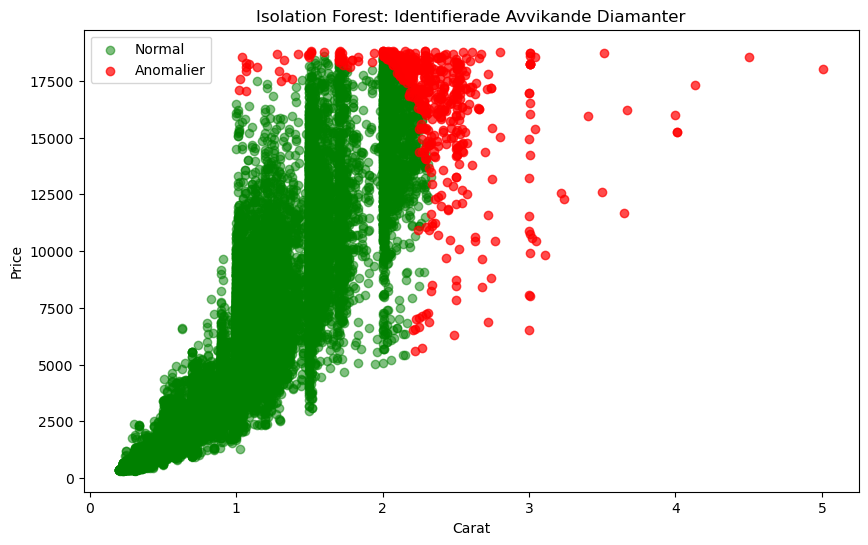

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(normal['carat'], normal['price'], c='green', label='Normal', alpha=0.5)
plt.scatter(anomalies['carat'], anomalies['price'], c='red', label='Anomalier', alpha=0.7)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Isolation Forest: Identifierade Avvikande Diamanter')
plt.legend()
plt.show()

In [23]:
# Topp 10 avvikare (sorterat efter carat)
anomalies_sorted = anomalies.sort_values(by='carat', ascending=False)
anomalies_sorted[['carat', 'price', 'cut', 'color', 'clarity']].head(10)

carat    price        cut color clarity
27415   5.01  18018.0       Fair     J      I1
27630   4.50  18531.0       Fair     J      I1
27130   4.13  17329.0       Fair     H      I1
25999   4.01  15223.0    Premium     J      I1
25998   4.01  15223.0    Premium     I      I1
26444   4.00  15984.0  Very Good     I      I1
26534   3.67  16193.0    Premium     I      I1
23644   3.65  11668.0       Fair     H      I1
27679   3.51  18701.0    Premium     J     VS2
24328   3.50  12587.0      Ideal     H      I1

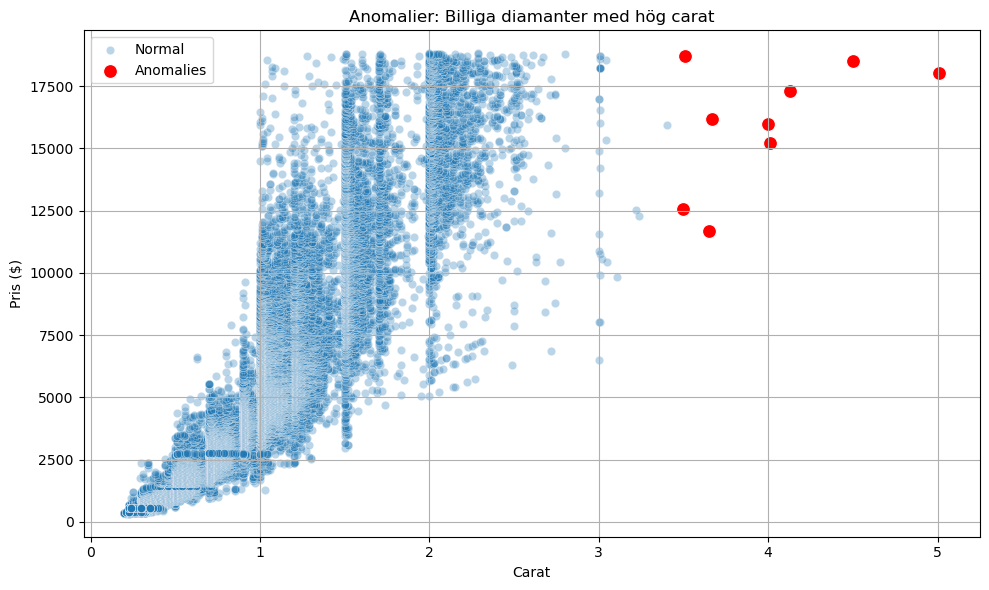

carat        cut color clarity    price  price_per_carat
27415   5.01       Fair     J      I1  18018.0      3596.407186
27630   4.50       Fair     J      I1  18531.0      4118.000000
27130   4.13       Fair     H      I1  17329.0      4195.883777
25998   4.01    Premium     I      I1  15223.0      3796.259352
25999   4.01    Premium     J      I1  15223.0      3796.259352
26444   4.00  Very Good     I      I1  15984.0      3996.000000
26534   3.67    Premium     I      I1  16193.0      4412.261580
23644   3.65       Fair     H      I1  11668.0      3196.712329
27679   3.51    Premium     J     VS2  18701.0      5327.920228
24328   3.50      Ideal     H      I1  12587.0      3596.285714

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Ladda dataset
df = pd.read_csv("diamonds.csv")

# Ta bort rader med saknade värden (NaN)
df.dropna(subset=["carat", "price"], inplace=True)

# Lägg till pris per carat
df["price_per_carat"] = df["price"] / df["carat"]

# Fit IsolationForest för att hitta ovanligt billiga stora diamanter
features = df[["carat", "price"]]
model = IsolationForest(contamination=0.01, random_state=42)
df["anomaly"] = model.fit_predict(features)

# Välj ut avvikande observationer (label -1)
anomalies = df[df["anomaly"] == -1].sort_values(by="carat", ascending=False).head(10)

# Visualisera
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="carat", y="price", alpha=0.3, label="Normal")
sns.scatterplot(data=anomalies, x="carat", y="price", color="red", s=100, label="Anomalies")
plt.title("Anomalier: Billiga diamanter med hög carat")
plt.xlabel("Carat")
plt.ylabel("Pris ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visa intressanta avvikelser
anomalies[["carat", "cut", "color", "clarity", "price", "price_per_carat"]]

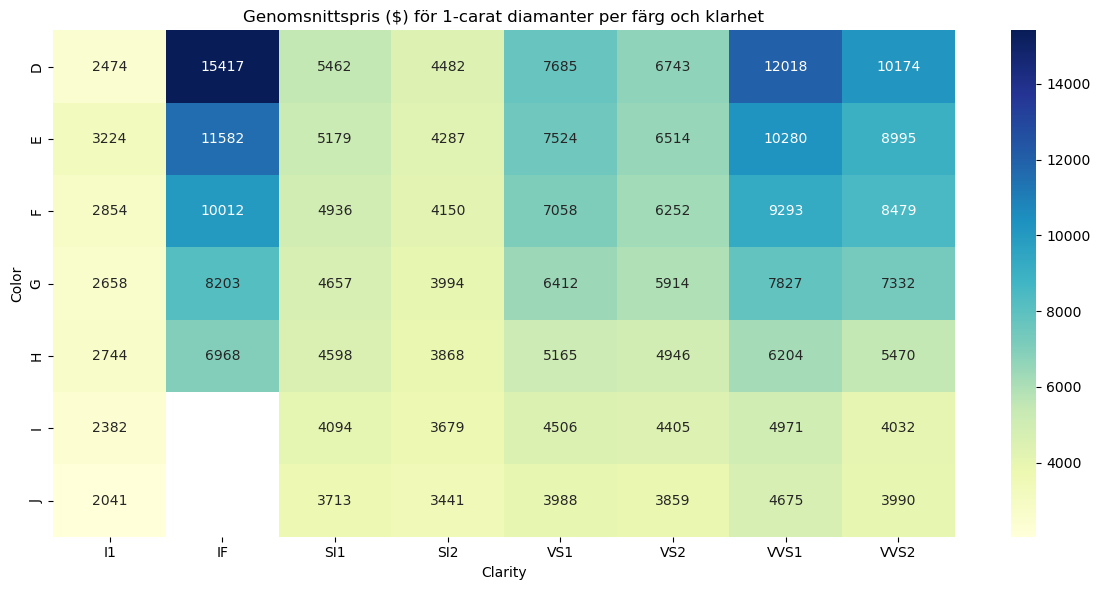

In [31]:
# Filtrera ut diamanter nära 1 carat (pga flyttal): +/- 0.01
df_1_carat = df[(df["carat"] >= 0.99) & (df["carat"] <= 1.01)]

# Skapa pivot-tabell: medelpris per kombination av färg och klarhet
pivot = df_1_carat.pivot_table(
    index="color",
    columns="clarity",
    values="price",
    aggfunc="mean"
)

# Visualisera som heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Genomsnittspris ($) för 1-carat diamanter per färg och klarhet")
plt.xlabel("Clarity")
plt.ylabel("Color")
plt.tight_layout()
plt.show()

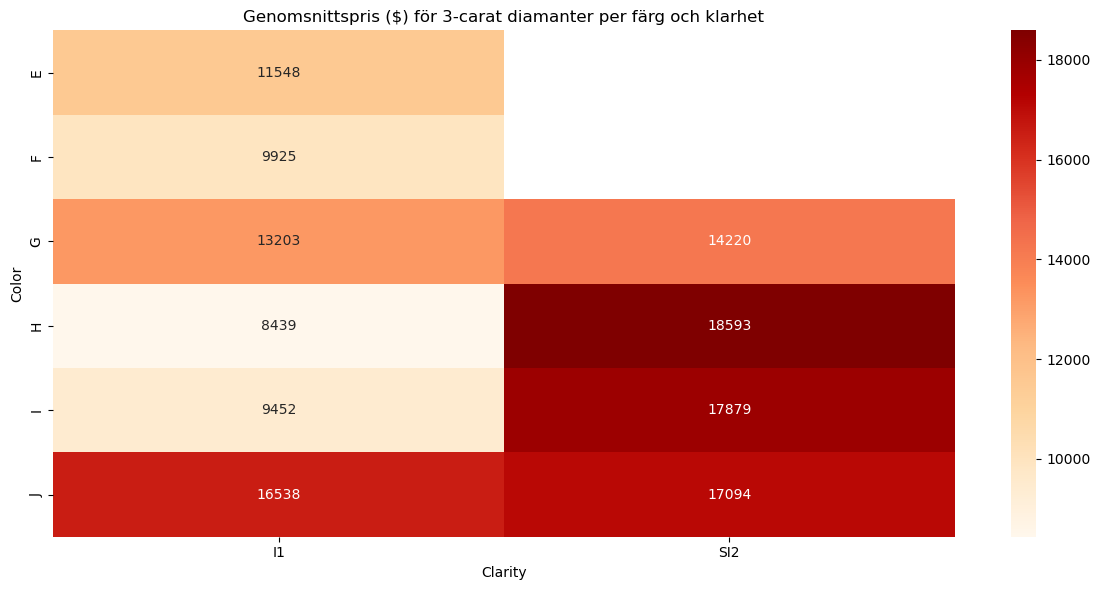

In [33]:
df_3_carat = df[(df["carat"] >= 2.99) & (df["carat"] <= 3.01)]

# Skapa pivot-tabell: medelpris per kombination av färg och klarhet
pivot_3 = df_3_carat.pivot_table(
    index="color",
    columns="clarity",
    values="price",
    aggfunc="mean"
)

# Visualisera som heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_3, annot=True, fmt=".0f", cmap="OrRd")
plt.title("Genomsnittspris ($) för 3-carat diamanter per färg och klarhet")
plt.xlabel("Clarity")
plt.ylabel("Color")
plt.tight_layout()
plt.show()

💎 Topp 10 dyraste per carat (lyxsegment):
       carat        cut color clarity    price  price_per_carat
27635   1.04  Very Good     D      IF  18542.0     17828.846154
27530   1.07    Premium     D      IF  18279.0     17083.177570
27226   1.03      Ideal     D      IF  17590.0     17077.669903
27457   1.07  Very Good     D      IF  18114.0     16928.971963
26998   1.02  Very Good     D      IF  17100.0     16764.705882
27349   1.07  Very Good     D      IF  17909.0     16737.383178
27507   1.09  Very Good     D      IF  18231.0     16725.688073
26660   1.00      Ideal     D      IF  16469.0     16469.000000
26549   1.01    Premium     D      IF  16234.0     16073.267327
26483   1.00  Very Good     D      IF  16073.0     16073.000000

💰 Botten 10 billigaste per carat (möjlig ROI):
       carat        cut color clarity  price  price_per_carat
31962   0.43    Premium     H      I1  452.0      1051.162791
15      0.32    Premium     E      I1  345.0      1078.125000
4       0.31       G

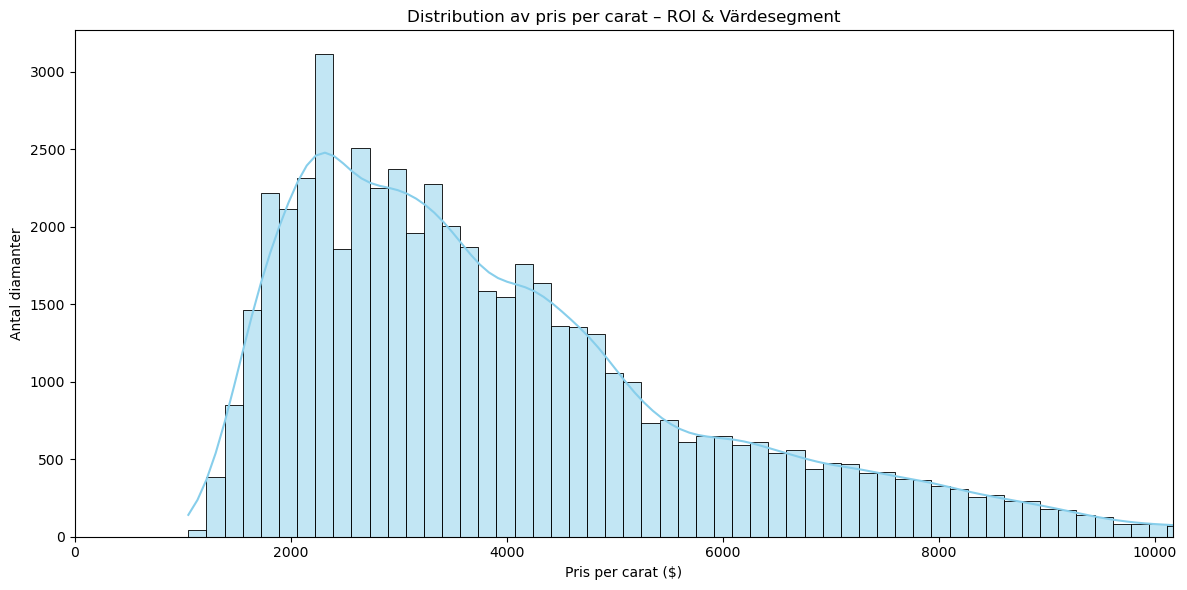

In [35]:
# Skapa ny kolumn: price per carat
df["price_per_carat"] = df["price"] / df["carat"]

# Sortera för analys
top10 = df.sort_values("price_per_carat", ascending=False).head(10)
bottom10 = df.sort_values("price_per_carat", ascending=True).head(10)

# Visa topp och botten
print("💎 Topp 10 dyraste per carat (lyxsegment):")
print(top10[["carat", "cut", "color", "clarity", "price", "price_per_carat"]])

print("\n💰 Botten 10 billigaste per carat (möjlig ROI):")
print(bottom10[["carat", "cut", "color", "clarity", "price", "price_per_carat"]])

# Distribution av pris per carat
plt.figure(figsize=(12, 6))
sns.histplot(df["price_per_carat"], bins=100, kde=True, color='skyblue')
plt.title("Distribution av pris per carat – ROI & Värdesegment")
plt.xlabel("Pris per carat ($)")
plt.ylabel("Antal diamanter")
plt.xlim(0, df["price_per_carat"].quantile(0.99))  # klipper outliers
plt.tight_layout()
plt.show()

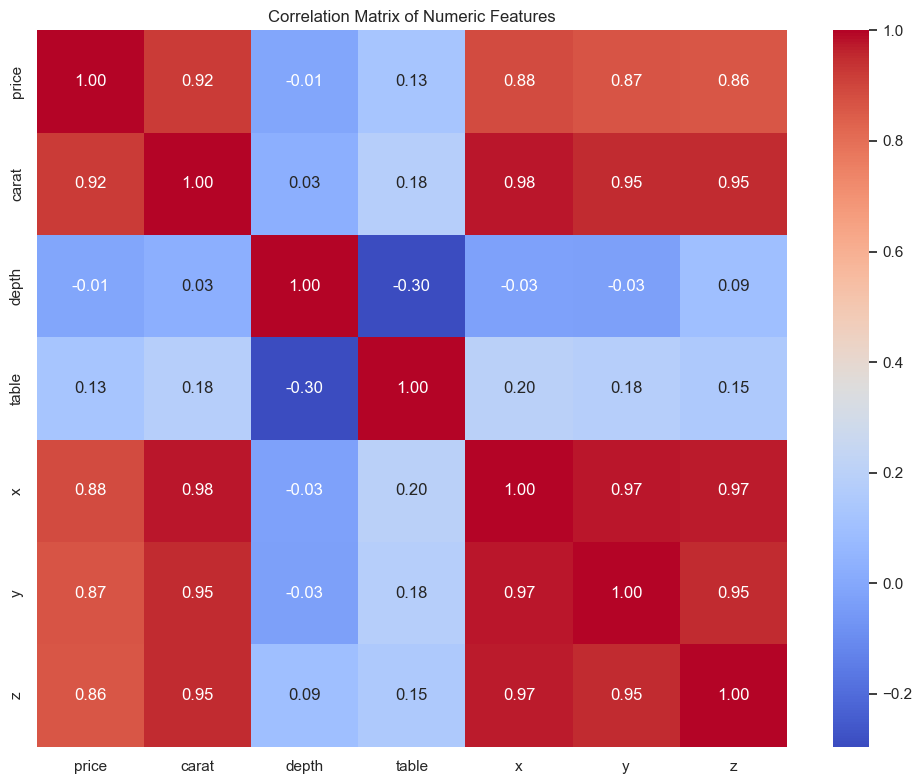

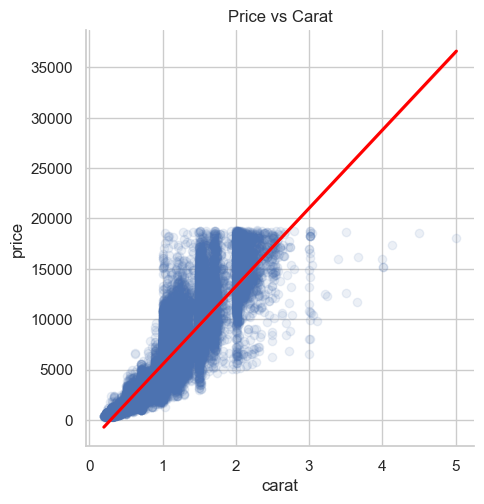

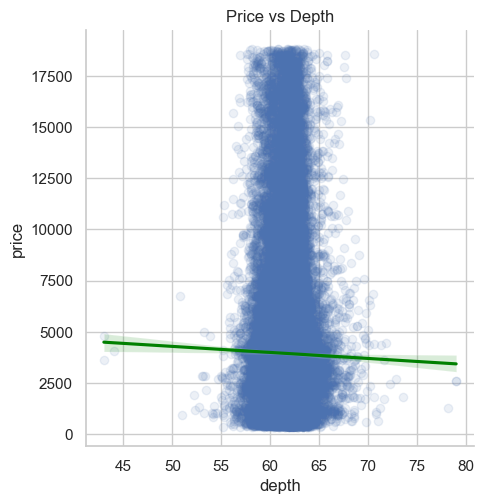

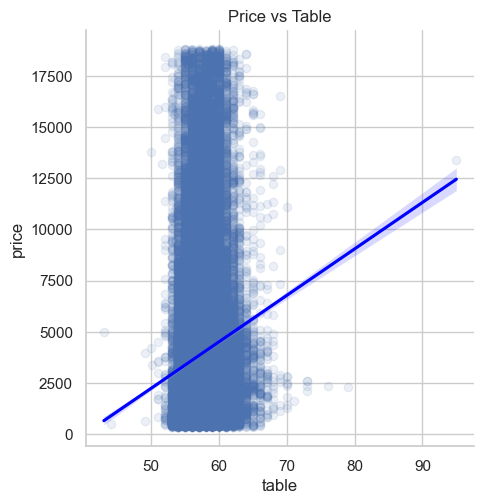

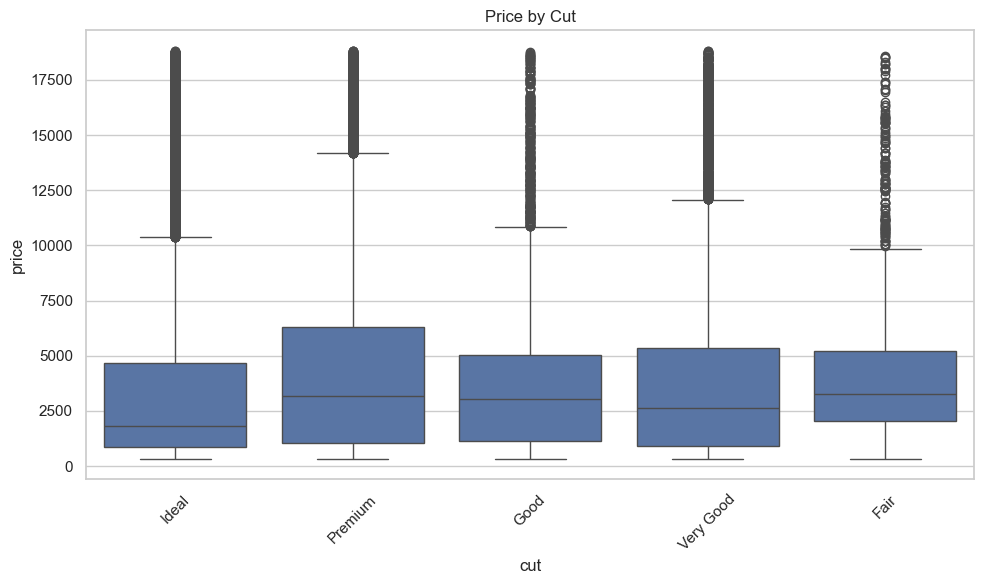

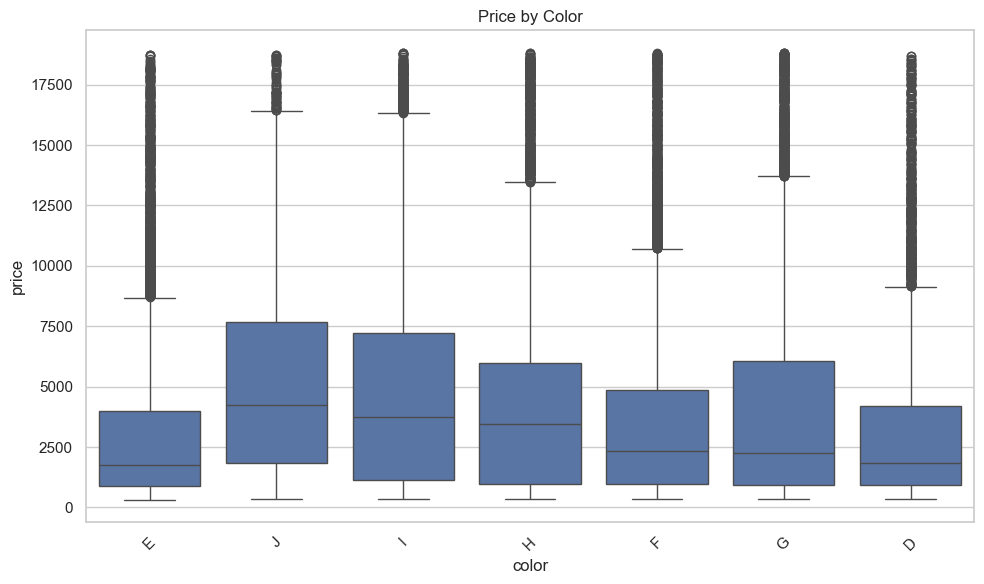

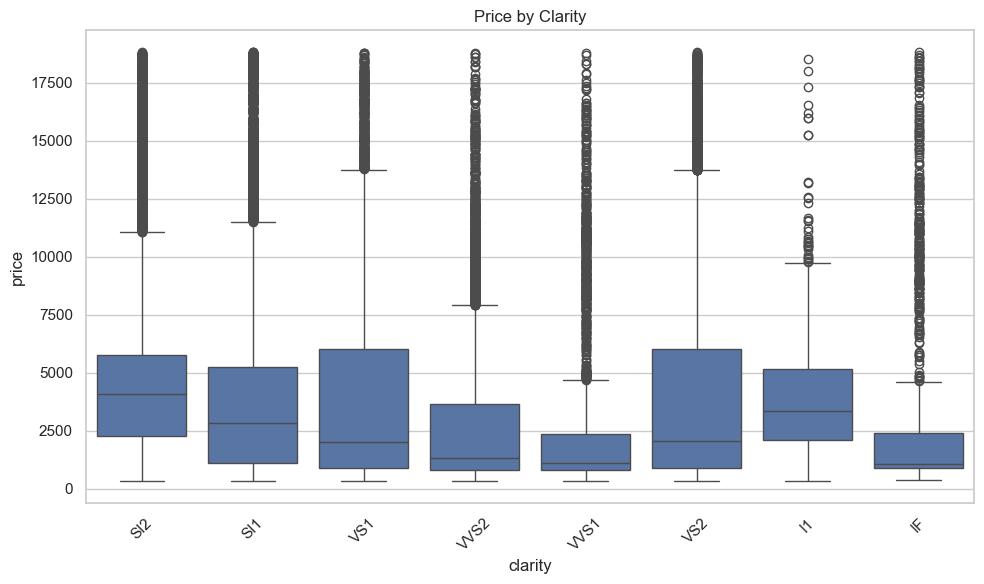

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diamonds.csv')

# Set style for seaborn
sns.set(style="whitegrid")

# --- 1. Correlation Matrix for numerical columns ---
plt.figure(figsize=(10, 8))
corr_matrix = df[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# --- 2. Regression Plots ---
# price vs carat
sns.lmplot(data=df, x='carat', y='price', scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
plt.title("Price vs Carat")
plt.show()

# price vs depth
sns.lmplot(data=df, x='depth', y='price', scatter_kws={'alpha':0.1}, line_kws={'color': 'green'})
plt.title("Price vs Depth")
plt.show()

# price vs table
sns.lmplot(data=df, x='table', y='price', scatter_kws={'alpha':0.1}, line_kws={'color': 'blue'})
plt.title("Price vs Table")
plt.show()

# --- 3. Boxplots for Categorical Features ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price')
plt.title("Price by Cut")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='color', y='price')
plt.title("Price by Color")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price')
plt.title("Price by Clarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='clarity', ylabel='color'>

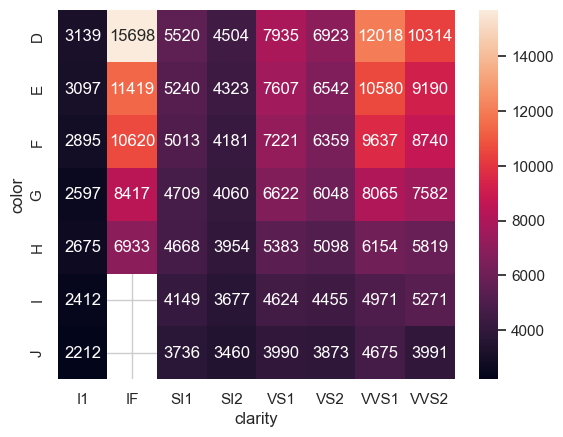

In [44]:
df_1carat = df[df['carat'].round(1) == 1.0]
pivot = df_1carat.pivot_table(index='color', columns='clarity', values='price', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f')

# DEL 2

### 🎯 Syfte
Guldfynd överväger att utöka sitt sortiment med diamanter. Den här analysen syftar till att identifiera vilka faktorer som påverkar diamantpriserna mest, och ge rekommendationer kring vilka typer av diamanter som har bäst värde och potential för avkastning.

Vi använder datasetet `diamonds.csv` som innehåller över 50 000 observationer.

---


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laddar in data
df = pd.read_csv('diamonds.csv')
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07   
3           4   0.29      NaN   NaN     NaN    NaN    NaN    NaN  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [52]:
# Kontrollera datatyper och saknade värden
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53918 non-null  float64
 2   cut         53939 non-null  object 
 3   color       53936 non-null  object 
 4   clarity     53910 non-null  object 
 5   depth       53934 non-null  float64
 6   table       53935 non-null  float64
 7   price       53928 non-null  float64
 8   x           53937 non-null  float64
 9   y           53936 non-null  float64
 10  z           53937 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


Unnamed: 0     0
carat         22
cut            1
color          4
clarity       30
depth          6
table          5
price         12
x              3
y              4
z              3
dtype: int64

In [54]:
# Vi börjar med att undersöka vilka numeriska och kategoriska faktorer som påverkar priset.


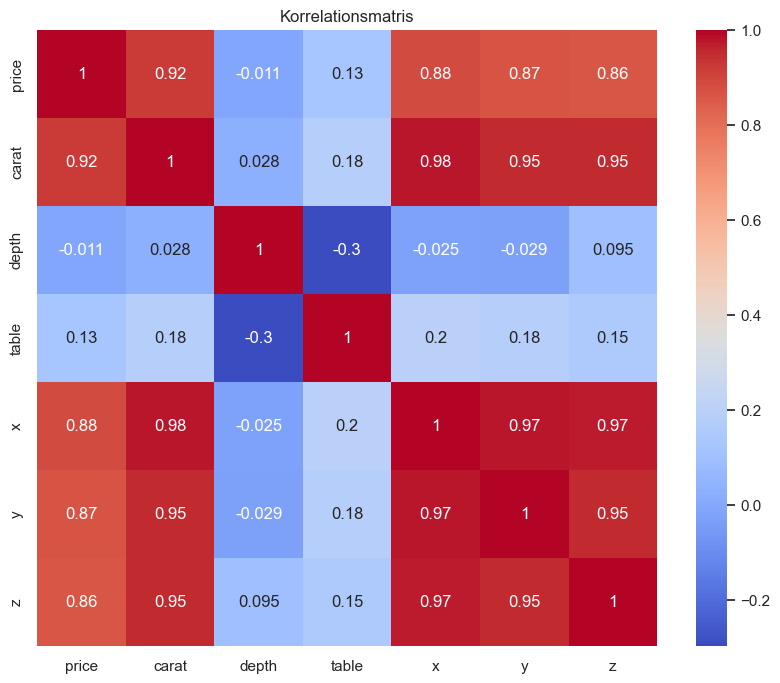

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].corr(), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatris")
plt.show()

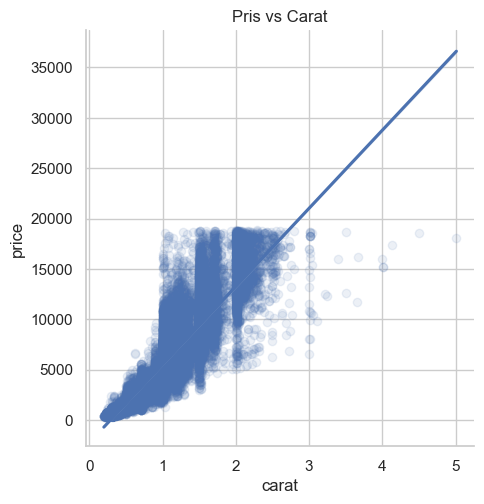

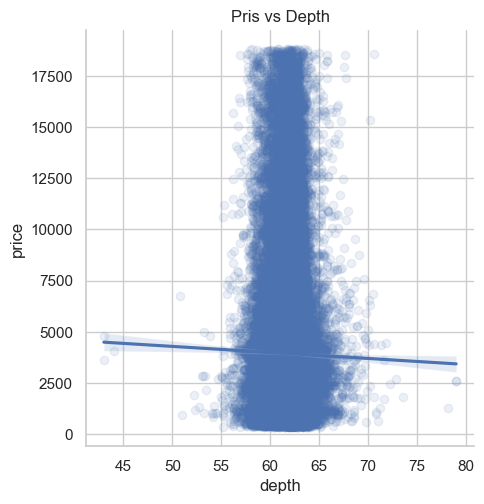

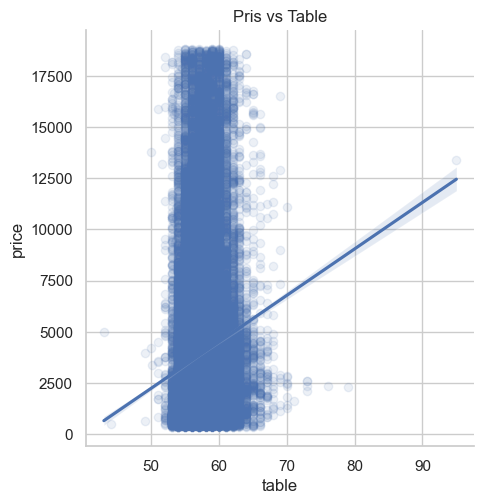

In [58]:
sns.lmplot(data=df, x='carat', y='price', scatter_kws={'alpha':0.1})
plt.title("Pris vs Carat")
plt.show()

sns.lmplot(data=df, x='depth', y='price', scatter_kws={'alpha':0.1})
plt.title("Pris vs Depth")
plt.show()

sns.lmplot(data=df, x='table', y='price', scatter_kws={'alpha':0.1})
plt.title("Pris vs Table")
plt.show()

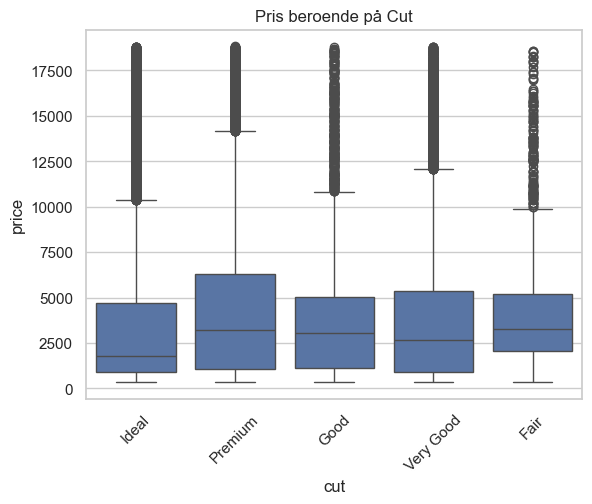

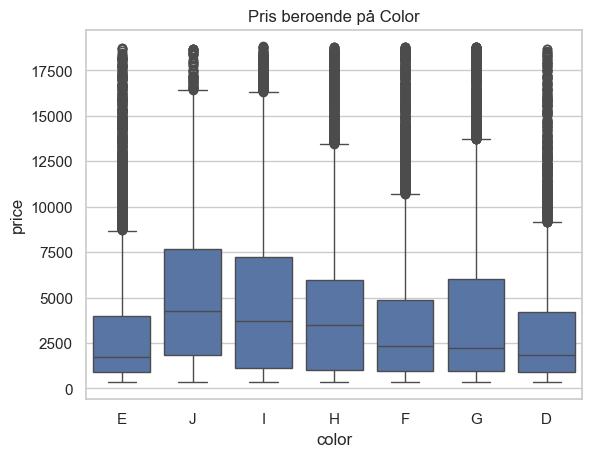

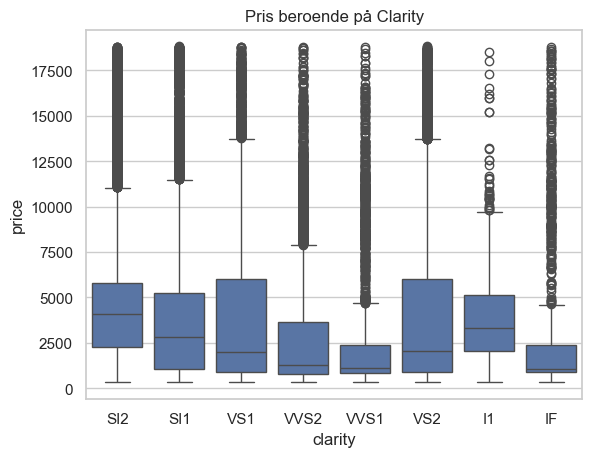

In [60]:
sns.boxplot(data=df, x='cut', y='price')
plt.title("Pris beroende på Cut")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='color', y='price')
plt.title("Pris beroende på Color")
plt.show()

sns.boxplot(data=df, x='clarity', y='price')
plt.title("Pris beroende på Clarity")
plt.show()

In [62]:
df['price_per_carat'] = df['price'] / df['carat']
df[['carat', 'price', 'price_per_carat']].sort_values(by='price_per_carat', ascending=False).head(10)

carat    price  price_per_carat
27635   1.04  18542.0     17828.846154
27530   1.07  18279.0     17083.177570
27226   1.03  17590.0     17077.669903
27457   1.07  18114.0     16928.971963
26998   1.02  17100.0     16764.705882
27349   1.07  17909.0     16737.383178
27507   1.09  18231.0     16725.688073
26660   1.00  16469.0     16469.000000
26549   1.01  16234.0     16073.267327
26483   1.00  16073.0     16073.000000

In [64]:
top10 = df.sort_values('price_per_carat', ascending=False).head(10)
top10[['carat', 'cut', 'color', 'clarity', 'price_per_carat']]

carat        cut color clarity  price_per_carat
27635   1.04  Very Good     D      IF     17828.846154
27530   1.07    Premium     D      IF     17083.177570
27226   1.03      Ideal     D      IF     17077.669903
27457   1.07  Very Good     D      IF     16928.971963
26998   1.02  Very Good     D      IF     16764.705882
27349   1.07  Very Good     D      IF     16737.383178
27507   1.09  Very Good     D      IF     16725.688073
26660   1.00      Ideal     D      IF     16469.000000
26549   1.01    Premium     D      IF     16073.267327
26483   1.00  Very Good     D      IF     16073.000000

In [66]:
bottom10 = df[df['carat'] >= 0.5].sort_values('price_per_carat').head(10)
bottom10[['carat', 'cut', 'color', 'clarity', 'price_per_carat']]

carat      cut color clarity  price_per_carat
8392    0.50     Fair     F      I1      1168.000000
41918   1.03     Fair     E      I1      1225.242718
17719   0.50     Fair     F      I1      1226.000000
17717   0.50     Fair     F      I1      1226.000000
21711   0.50     Fair     F      I1      1254.000000
21712   0.50     Fair     F      I1      1254.000000
36571   0.72  Premium     J      I1      1312.500000
32833   0.60  Premium     H      I1      1343.333333
36572   0.70     Fair     F      I1      1350.000000
38152   0.75     Good     F      I1      1350.666667

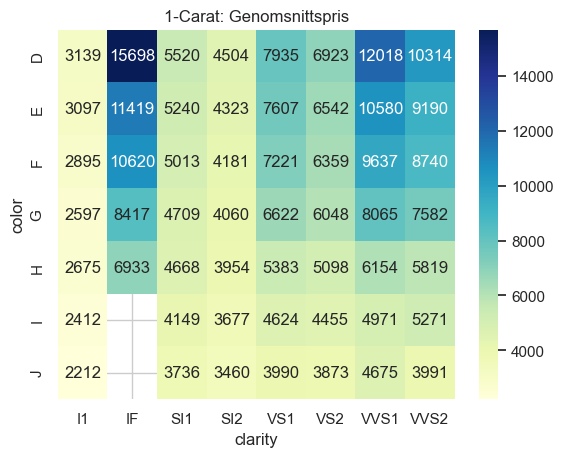

In [68]:
df_1carat = df[(df['carat'] >= 0.95) & (df['carat'] <= 1.05)]
pivot_1 = df_1carat.pivot_table(index='color', columns='clarity', values='price', aggfunc='mean')
sns.heatmap(pivot_1, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("1-Carat: Genomsnittspris")
plt.show()

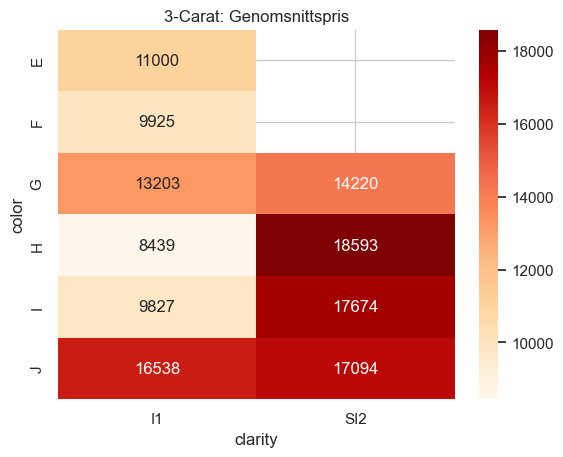

In [70]:
df_3carat = df[(df['carat'] >= 2.95) & (df['carat'] <= 3.05)]
pivot_3 = df_3carat.pivot_table(index='color', columns='clarity', values='price', aggfunc='mean')
sns.heatmap(pivot_3, annot=True, fmt=".0f", cmap='OrRd')
plt.title("3-Carat: Genomsnittspris")
plt.show()

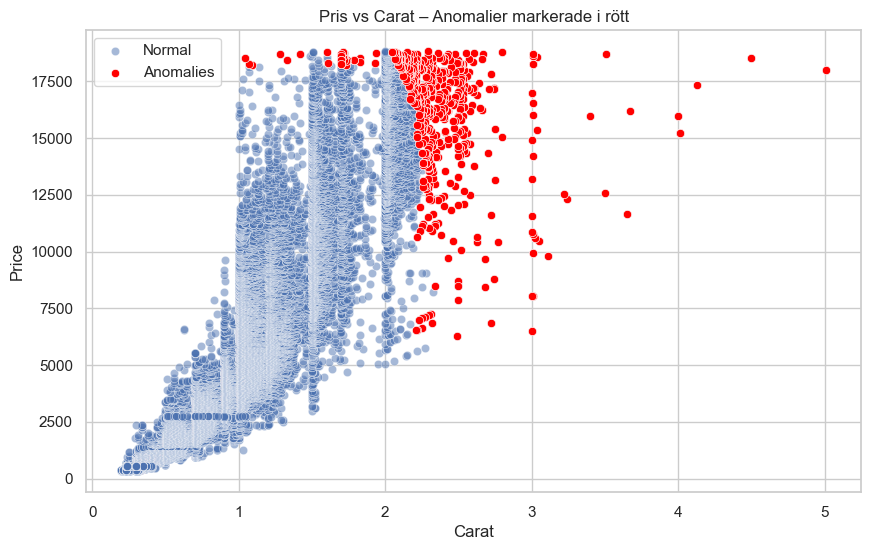

In [78]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Välj endast kolumnerna vi analyserar
df_clean = df[['carat', 'price']].dropna()

# 2. Träna modellen
iso = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso.fit_predict(df_clean)

# 3. Lägg till tillbaka som kolumn i ursprungligt DataFrame (endast för de rader som finns kvar)
df.loc[df_clean.index, 'anomaly'] = anomalies

# 4. Filtrera fram anomalierna (värde -1)
anomaly_df = df[df['anomaly'] == -1].sort_values('carat', ascending=False)

# 5. Visualisera
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', label='Normal', alpha=0.5)
sns.scatterplot(data=anomaly_df, x='carat', y='price', color='red', label='Anomalies')
plt.title("Pris vs Carat – Anomalier markerade i rött")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# Visa topp 10 billigaste stora diamanter (sortera på carat neråt, pris uppåt)
anomaly_df = df[df['anomaly'] == -1].copy()
anomaly_df = anomaly_df.sort_values(by=['carat', 'price'], ascending=[False, True])

# Visa de mest intressanta fynden
anomaly_df[['carat', 'price', 'cut', 'color', 'clarity']].head(10)

fynd = anomaly_df[(anomaly_df['carat'] >= 1.0) & (anomaly_df['price'] < 3000)]
fynd[['carat', 'price', 'cut', 'color', 'clarity']].sort_values(by='carat', ascending=False)


Empty DataFrame
Columns: [carat, price, cut, color, clarity]
Index: []

### 📌 Slutsatser & Rekommendationer

- Pris påverkas starkast av **carat**.
- För bästa ROI:
  - **Låga pris per carat** finns bland stenar med carat runt 1.0–1.5, color G–I, clarity VS1–SI1.
- För premiumsortiment:
  - Satsa på små men lyxiga diamanter: låg carat men högt pris/carat (ex: color D, clarity IF).
- Använd heatmaps för att identifiera "sweet spots" – t.ex. 1-carat VS1 + color G är bra balans mellan pris och kvalitet.
- Undvik anomalier (billiga stora stenar) om de saknar kvalitet – risk för missnöje.

🎯 Rekommendation: Guldfynd kan med fördel erbjuda:
- Ett "värdesegment" (rimliga priser per carat)
- Ett "lyxsegment" (högt pris/carat)

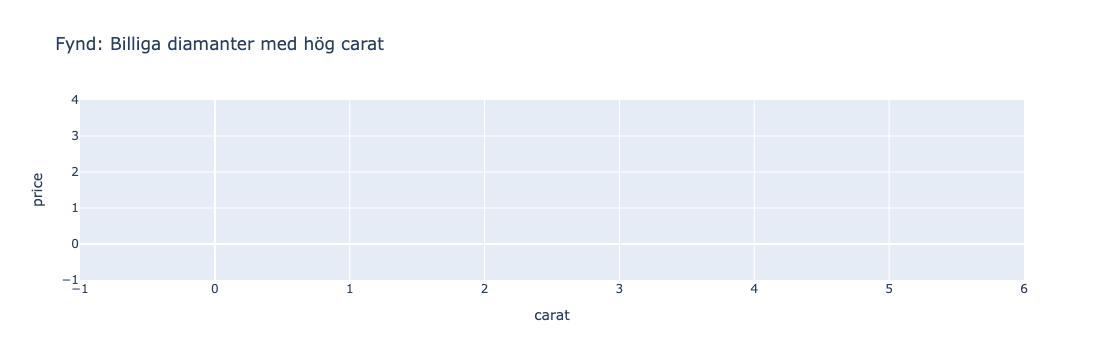

ModuleNotFoundError: No module named 'pandasgui'

In [86]:
import plotly.express as px

# Fynden: anomalier med hög carat och lågt pris
fynd = anomaly_df[(anomaly_df['carat'] >= 1.0) & (anomaly_df['price'] < 3000)]

# Visa interaktiv tabell
fig = px.scatter(
    fynd,
    x='carat',
    y='price',
    hover_data=['cut', 'color', 'clarity'],
    title='Fynd: Billiga diamanter med hög carat'
)
fig.show()

from pandasgui import show

# Starta interaktiv GUI
show(fynd)

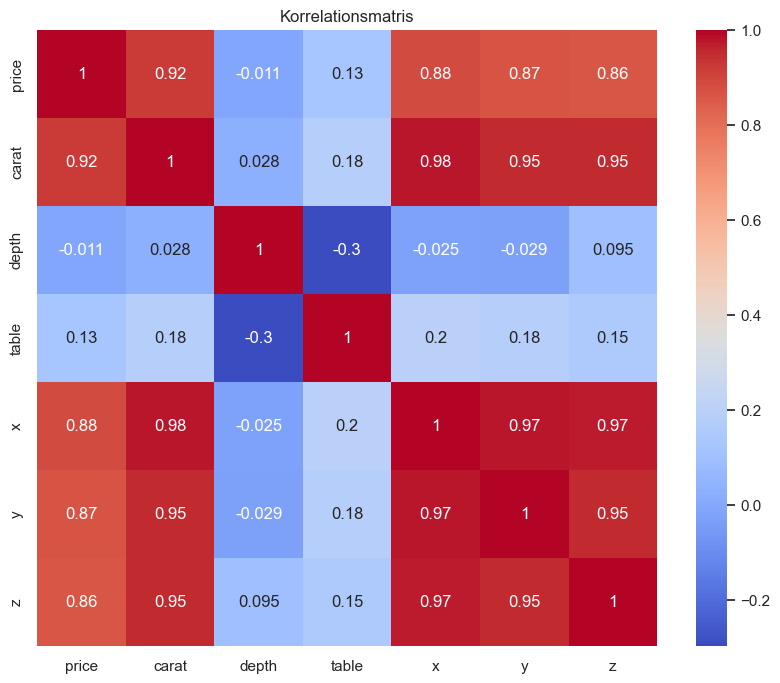

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].corr(), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatris")
plt.show()

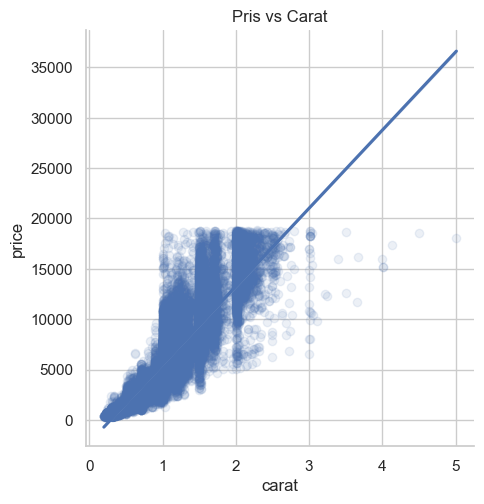

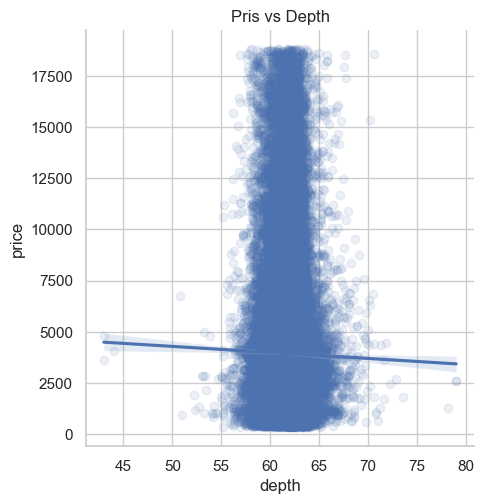

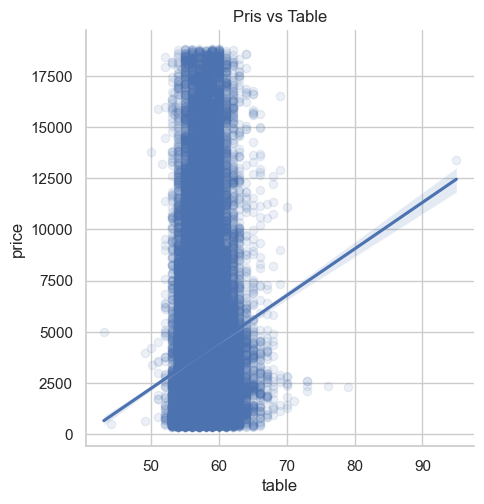

In [96]:
sns.lmplot(data=df, x='carat', y='price', scatter_kws={'alpha':0.1})
plt.title("Pris vs Carat")
plt.show()

sns.lmplot(data=df, x='depth', y='price', scatter_kws={'alpha':0.1})
plt.title("Pris vs Depth")
plt.show()

sns.lmplot(data=df, x='table', y='price', scatter_kws={'alpha':0.1})
plt.title("Pris vs Table")
plt.show()